# IMPORT SECTION

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from keras.callbacks import Callback

import time

# DATASET

In [2]:
data = pd.read_csv("../input/age-gender-and-ethnicity-face-data-csv/age_gender.csv")
print(data.shape)
data.head()

(23705, 5)


,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [3]:
data = data.drop('img_name', axis=1)
print(data.shape)
data.head()

(23705, 4)


,age,ethnicity,gender,pixels
0,1,2,0,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,202 205 209 210 209 209 210 211 212 214 218 21...


In [4]:
data.loc[(data['age'] > 0) & (data['age'] <= 10), 'age'] = 0
data.loc[(data['age'] > 10) & (data['age'] <= 20), 'age'] = 1
data.loc[(data['age'] > 20) & (data['age'] <= 30), 'age'] = 2
data.loc[(data['age'] > 30) & (data['age'] <= 40), 'age'] = 3
data.loc[(data['age'] > 40) & (data['age'] <= 50), 'age'] = 4
data.loc[(data['age'] > 50) & (data['age'] <= 60), 'age'] = 5
data.loc[(data['age'] > 60) & (data['age'] <= 70), 'age'] = 6
data.loc[(data['age'] > 70) & (data['age'] <= 80), 'age'] = 7
data.loc[(data['age'] > 80) & (data['age'] <= 90), 'age'] = 8
data.loc[(data['age'] > 90) & (data['age'] <= 120), 'age'] = 9

In [5]:
data

,age,ethnicity,gender,pixels
0,0,2,0,129 128 128 126 127 130 133 135 139 142 145 14...
1,0,2,0,164 74 111 168 169 171 175 182 184 188 193 199...
2,0,2,0,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,0,2,0,193 197 198 200 199 200 202 203 204 205 208 21...
4,0,2,0,202 205 209 210 209 209 210 211 212 214 218 21...
...,...,...,...,...
23700,9,0,1,127 100 94 81 77 77 74 99 102 98 128 145 160 1...
23701,9,1,1,23 28 32 35 42 47 68 85 98 103 113 117 130 129...
23702,9,2,1,59 50 37 40 34 19 30 101 156 170 177 184 187 1...
23703,9,2,1,45 108 120 156 206 197 140 180 191 199 204 207...


Text(0.5, 1.0, 'Age countplot')

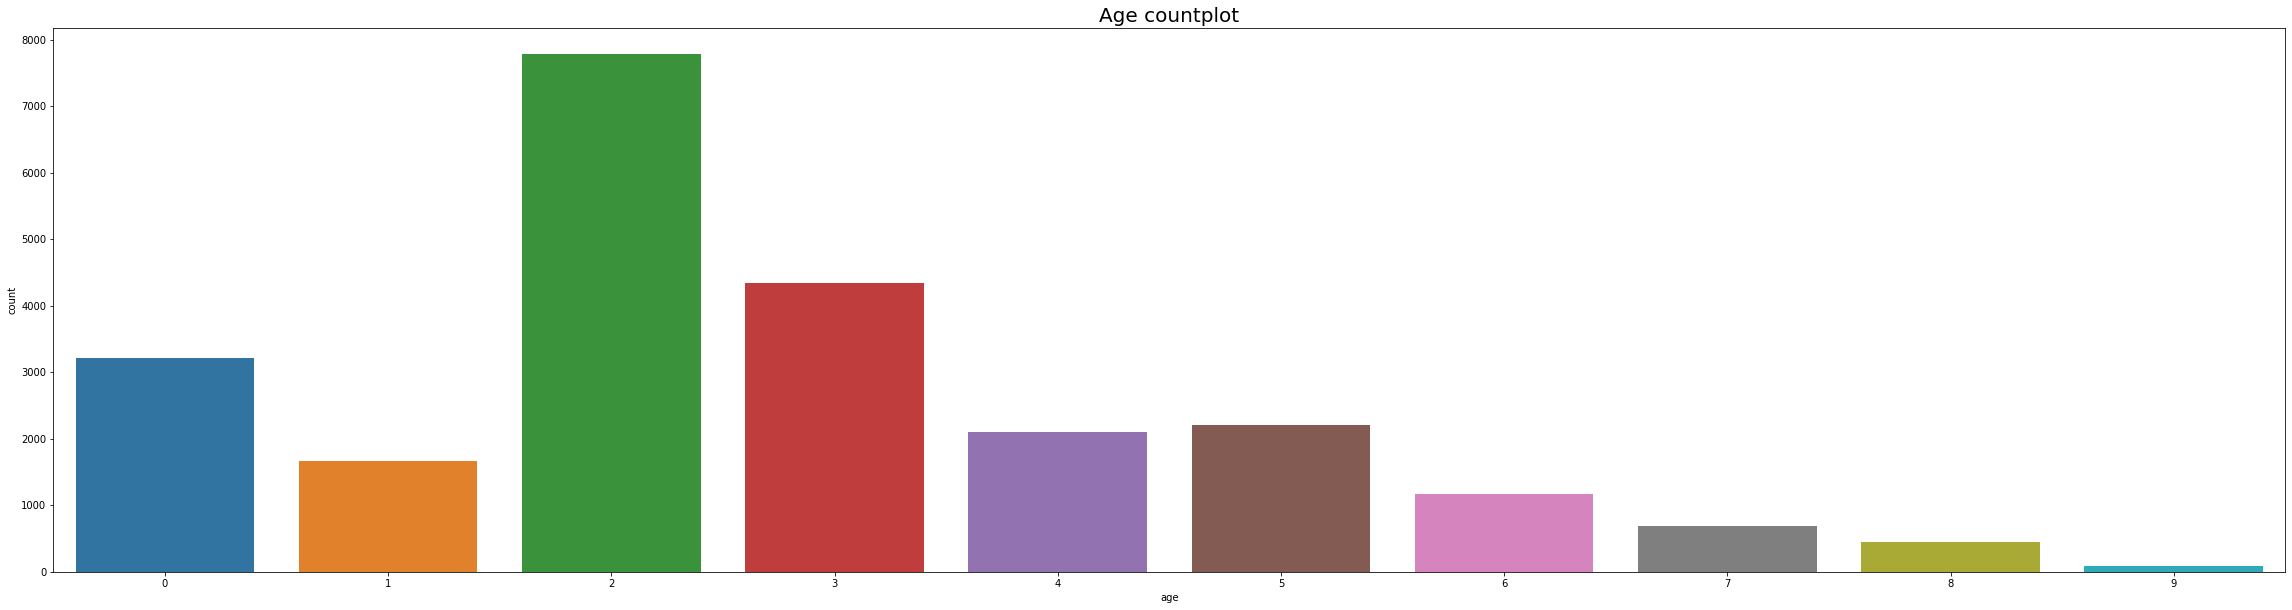

In [6]:
plt.figure(figsize=(40,10))
sns.countplot(x=data['age'])
plt.title('Age countplot', fontsize=20)

Text(0.5, 1.0, 'Gender countplot')

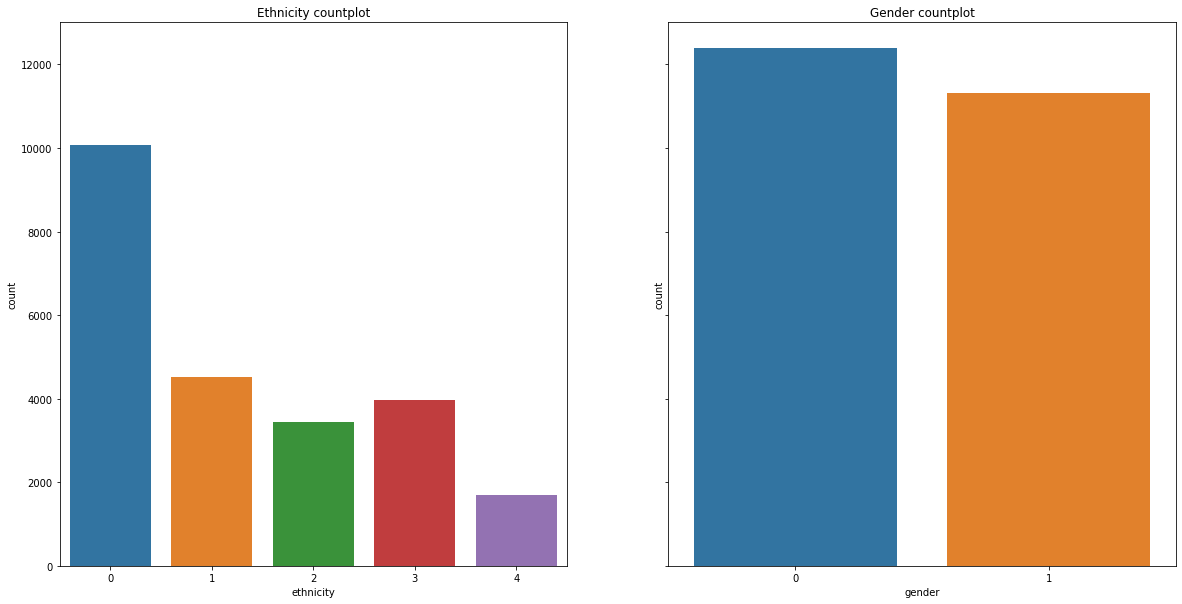

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharey=True)

sns.countplot(ax=axes[0], x=data['ethnicity'])
axes[0].set_title('Ethnicity countplot')

sns.countplot(ax=axes[1], x=data['gender'])
axes[1].set_title('Gender countplot')

In [8]:
data['pixels'] = data['pixels'].map(lambda x: np.array(x.split(' '), dtype=np.float32).reshape(48, 48))

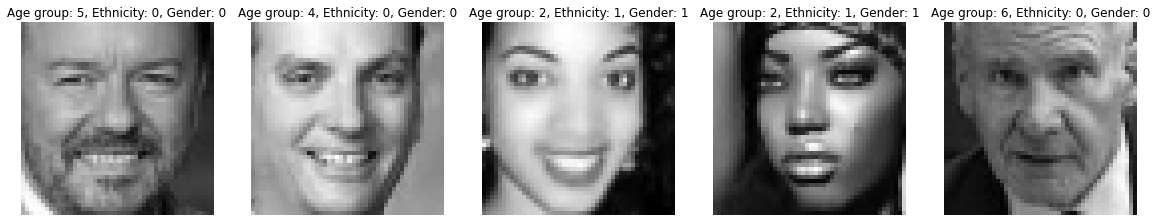

In [9]:
fig, axes = plt.subplots(1, 5, figsize=(20, 10))
for i in range(5):
    random_face = np.random.choice(len(data))
    age = data['age'][random_face]
    ethnicity = data['ethnicity'][random_face]
    gender = data['gender'][random_face]
    
    axes[i].set_title('Age group: {0}, Ethnicity: {1}, Gender: {2}'.format(age, ethnicity, gender))
    axes[i].imshow(data['pixels'][random_face], cmap='gray')
    axes[i].axis('off')

In [10]:
x = np.array(data['pixels'].to_list())
x = x.reshape(x.shape[0], 48, 48, 1) / 255
input_shape = x.shape[1:]

In [11]:
y1 = to_categorical(np.array(data['age']), 10)
y2 = to_categorical(np.array(data['ethnicity']), 5)
y3 = np.array(data['gender'])

In [12]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y1, test_size = 0.3, random_state = 42)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y2, test_size = 0.3, random_state = 42)
x_train3, x_test3, y_train3, y_test3 = train_test_split(x, y3, test_size = 0.3, random_state = 42)

# AGE

In [13]:
model_age = Sequential()

model_age.add(Conv2D(8, kernel_size=(3, 3), input_shape=input_shape, padding='same', activation='relu'))
model_age.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model_age.add(Conv2D(16, kernel_size=(3, 3), padding='same', activation='relu'))
model_age.add(MaxPooling2D(pool_size=(2, 2), strides=2))

model_age.add(Flatten())

model_age.add(Dense(16, activation='relu'))
model_age.add(Dropout(0.3))

model_age.add(Dense(10, activation='softmax'))

model_age.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_age.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 16)                36880     
_________________________________________________________________
dropout (Dropout)            (None, 16)                0

2021-12-07 19:27:56.529433: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-07 19:27:56.613378: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-07 19:27:56.614120: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-07 19:27:56.615715: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [14]:
start_time = time.time()

history_age = model_age.fit(x_train1, y_train1, batch_size=128, epochs=25, validation_data=(x_test1, y_test1))

print("Time:", (time.time() - start_time) / 60)

2021-12-07 19:27:59.222238: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25


2021-12-07 19:28:00.377032: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


130/130 [==============================] - 7s 8ms/step - loss: 1.9628 - accuracy: 0.3341 - val_loss: 1.7140 - val_accuracy: 0.4170
Epoch 2/25
130/130 [==============================] - 1s 5ms/step - loss: 1.7124 - accuracy: 0.4105 - val_loss: 1.5811 - val_accuracy: 0.4263
Epoch 3/25
130/130 [==============================] - 1s 5ms/step - loss: 1.6288 - accuracy: 0.4129 - val_loss: 1.5126 - val_accuracy: 0.4322
Epoch 4/25
130/130 [==============================] - 1s 5ms/step - loss: 1.5870 - accuracy: 0.4246 - val_loss: 1.4818 - val_accuracy: 0.4481
Epoch 5/25
130/130 [==============================] - 1s 5ms/step - loss: 1.5493 - accuracy: 0.4290 - val_loss: 1.4442 - val_accuracy: 0.4522
Epoch 6/25
130/130 [==============================] - 1s 5ms/step - loss: 1.5178 - accuracy: 0.4372 - val_loss: 1.4289 - val_accuracy: 0.4627
Epoch 7/25
130/130 [==============================] - 1s 5ms/step - loss: 1.5010 - accuracy: 0.4431 - val_loss: 1.4137 - val_accuracy: 0.4798
Epoch 8/25
130/13

In [15]:
val_loss, val_acc = model_age.evaluate(x_test1, y_test1)

print('Accuracy:', history_age.history['accuracy'][-1])
print('Val (test) accuracy:', history_age.history['val_accuracy'][-1])

223/223 [==============================] - 1s 2ms/step - loss: 1.2722 - accuracy: 0.5042
Accuracy: 0.4738142490386963
Val (test) accuracy: 0.5042182207107544


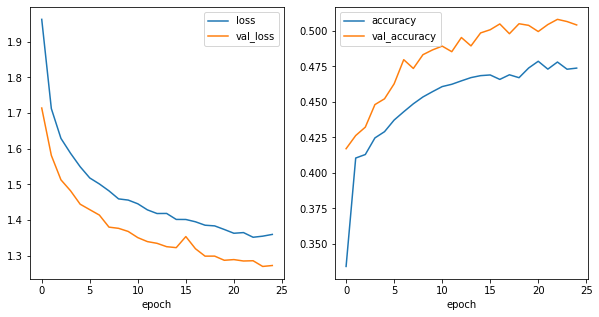

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(history_age.history['loss'], label='loss')
axs[0].plot(history_age.history['val_loss'], label='val_loss')
axs[0].set_xlabel('epoch')
axs[0].legend()

axs[1].plot(history_age.history['accuracy'], label='accuracy')
axs[1].plot(history_age.history['val_accuracy'], label='val_accuracy')
axs[1].set_xlabel('epoch')
axs[1].legend()
plt.show()

In [17]:
predictions1 = model_age.predict(x_test1)
predictions1 = np.argmax(predictions1, axis=1)
y_test1 = np.argmax(y_test1, axis=1)

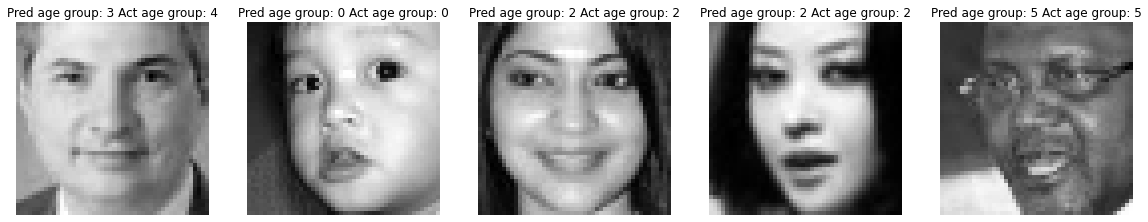

In [18]:
fig, axes = plt.subplots(1, 5, figsize=(20, 10))
for i in range(5):
    random_face = np.random.choice(len(predictions1))
    axes[i].set_title('Pred age group: ' + str(predictions1[random_face]) + ' Act age group: ' + str(y_test1[random_face]))
    axes[i].imshow(x_test1[random_face], cmap='gray')
    axes[i].axis('off')

In [19]:
mask1 = predictions1 == y_test1

x_false1 = x_test1[~mask1]
false_predictions1 = predictions1[~mask1]
y_false1 = y_test1[~mask1]

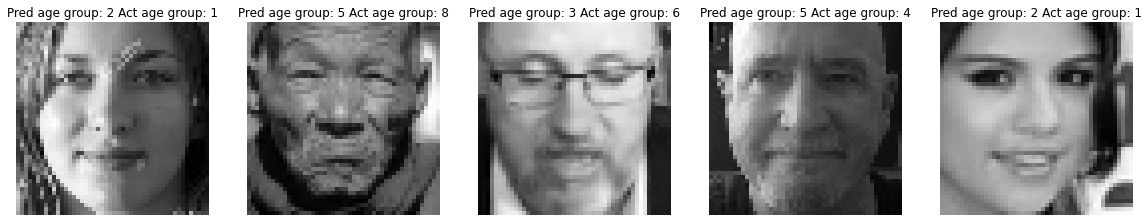

In [20]:
fig, axes = plt.subplots(1, 5, figsize=(20, 10))
for i in range(5):
    random_face = np.random.choice(len(false_predictions1))
    axes[i].set_title('Pred age group: ' + str(false_predictions1[random_face]) + ' Act age group: ' + str(y_false1[random_face]))
    axes[i].imshow(x_false1[random_face], cmap='gray')
    axes[i].axis('off')

# ETHNICITY

In [21]:
model_ethnicity = Sequential()

model_ethnicity.add(Conv2D(2, kernel_size=(3, 3), input_shape=input_shape, padding='same', activation='relu'))
model_ethnicity.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model_ethnicity.add(Conv2D(4, kernel_size=(3, 3), padding='same', activation='relu'))
model_ethnicity.add(MaxPooling2D(pool_size=(2, 2), strides=2))

model_ethnicity.add(Flatten())

model_age.add(Dense(4, activation='relu'))
model_age.add(Dropout(0.3))

model_ethnicity.add(Dense(5, activation='softmax'))

model_ethnicity.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_ethnicity.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 48, 48, 2)         20        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 2)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 4)         76        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 4)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 2885      
Total params: 2,981
Trainable params: 2,981
Non-trainable params: 0
____________________________________________________

In [22]:
start_time = time.time()

history_ethnicity = model_ethnicity.fit(x_train2, y_train2, epochs=25, validation_data=(x_test2, y_test2))

print("Time:", (time.time() - start_time) / 60)

Epoch 1/25
519/519 [==============================] - 3s 5ms/step - loss: 1.2626 - accuracy: 0.5014 - val_loss: 1.1078 - val_accuracy: 0.6146
Epoch 2/25
519/519 [==============================] - 2s 4ms/step - loss: 1.0278 - accuracy: 0.6242 - val_loss: 0.9609 - val_accuracy: 0.6558
Epoch 3/25
519/519 [==============================] - 2s 4ms/step - loss: 0.9432 - accuracy: 0.6608 - val_loss: 0.8985 - val_accuracy: 0.6808
Epoch 4/25
519/519 [==============================] - 2s 4ms/step - loss: 0.8990 - accuracy: 0.6810 - val_loss: 0.8719 - val_accuracy: 0.6992
Epoch 5/25
519/519 [==============================] - 2s 4ms/step - loss: 0.8675 - accuracy: 0.6919 - val_loss: 0.8638 - val_accuracy: 0.6877
Epoch 6/25
519/519 [==============================] - 2s 4ms/step - loss: 0.8396 - accuracy: 0.7051 - val_loss: 0.8392 - val_accuracy: 0.7039
Epoch 7/25
519/519 [==============================] - 2s 4ms/step - loss: 0.8244 - accuracy: 0.7108 - val_loss: 0.8610 - val_accuracy: 0.7013
Epoch 

In [23]:
val_loss, val_acc = model_ethnicity.evaluate(x_test2, y_test2)

print('Accuracy:', history_ethnicity.history['accuracy'][-1])
print('Val (test) accuracy:', history_ethnicity.history['val_accuracy'][-1])

223/223 [==============================] - 0s 2ms/step - loss: 0.7899 - accuracy: 0.7230
Accuracy: 0.7450731992721558
Val (test) accuracy: 0.7230033874511719


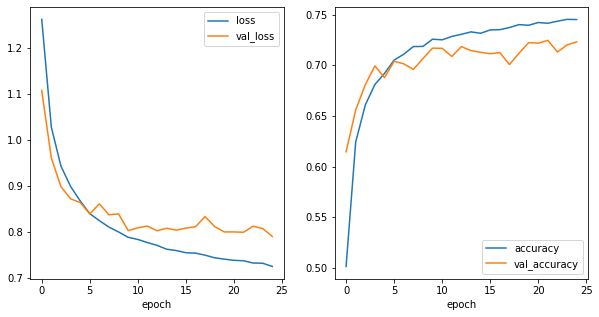

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(history_ethnicity.history['loss'], label='loss')
axs[0].plot(history_ethnicity.history['val_loss'], label='val_loss')
axs[0].set_xlabel('epoch')
axs[0].legend()

axs[1].plot(history_ethnicity.history['accuracy'], label='accuracy')
axs[1].plot(history_ethnicity.history['val_accuracy'], label='val_accuracy')
axs[1].set_xlabel('epoch')
axs[1].legend()
plt.show()

In [25]:
predictions2 = model_ethnicity.predict(x_test2)
predictions2 = np.argmax(predictions2, axis=1)
y_test2 = np.argmax(y_test2, axis=1)

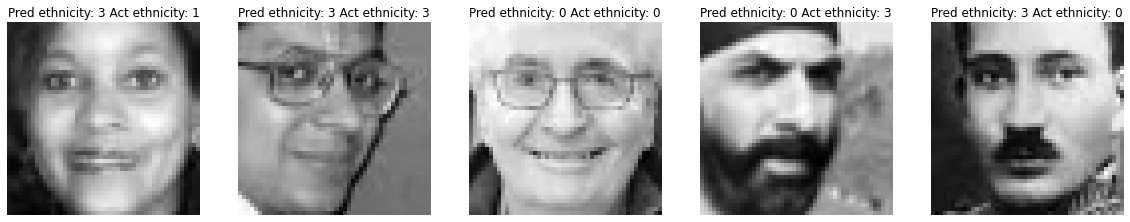

In [26]:
fig, axes = plt.subplots(1, 5, figsize=(20, 10))
for i in range(5):
    random_face = np.random.choice(len(predictions2))
    axes[i].set_title('Pred ethnicity: ' + str(predictions2[random_face]) + ' Act ethnicity: ' + str(y_test2[random_face]))
    axes[i].imshow(x_test2[random_face], cmap='gray')
    axes[i].axis('off')

In [27]:
mask2 = predictions2 == y_test2

x_false2 = x_test2[~mask2]
false_predictions2 = predictions2[~mask2]
y_false2 = y_test2[~mask2]

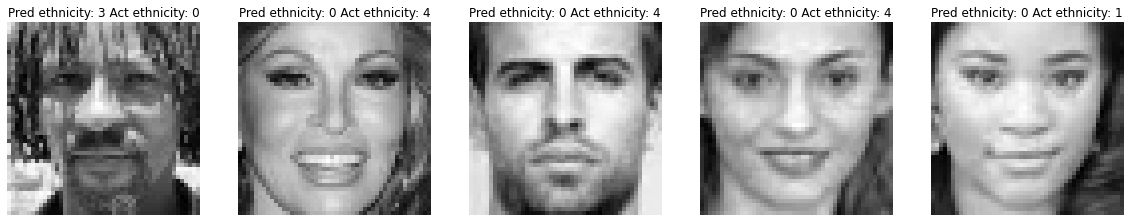

In [28]:
fig, axes = plt.subplots(1, 5, figsize=(20, 10))
for i in range(5):
    random_face = np.random.choice(len(false_predictions2))
    axes[i].set_title('Pred ethnicity: ' + str(false_predictions2[random_face]) + ' Act ethnicity: ' + str(y_false2[random_face]))
    axes[i].imshow(x_false2[random_face], cmap='gray')
    axes[i].axis('off')

# GENDER

In [29]:
model_gender = Sequential()

model_gender.add(Conv2D(2, kernel_size=(3, 3), input_shape=input_shape, padding='same', activation='relu'))
model_gender.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model_gender.add(Conv2D(4, kernel_size=(3, 3), padding='same', activation='relu'))
model_gender.add(MaxPooling2D(pool_size=(2, 2), strides=2))

model_gender.add(Flatten())

model_age.add(Dense(4, activation='relu'))
model_age.add(Dropout(0.3))

model_gender.add(Dense(1, activation='sigmoid'))

model_gender.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_gender.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 48, 48, 2)         20        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 2)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 4)         76        
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 4)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 577       
Total params: 673
Trainable params: 673
Non-trainable params: 0
________________________________________________________

In [30]:
start_time = time.time()

history_gender = model_gender.fit(x_train3, y_train3, epochs=25, validation_data=(x_test3, y_test3))

print("Time:", (time.time() - start_time) / 60)

Epoch 1/25
519/519 [==============================] - 3s 4ms/step - loss: 0.5702 - accuracy: 0.6970 - val_loss: 0.4922 - val_accuracy: 0.7677
Epoch 2/25
519/519 [==============================] - 2s 4ms/step - loss: 0.4693 - accuracy: 0.7842 - val_loss: 0.4556 - val_accuracy: 0.7885
Epoch 3/25
519/519 [==============================] - 2s 4ms/step - loss: 0.4466 - accuracy: 0.7972 - val_loss: 0.4430 - val_accuracy: 0.8005
Epoch 4/25
519/519 [==============================] - 2s 4ms/step - loss: 0.4280 - accuracy: 0.8102 - val_loss: 0.4290 - val_accuracy: 0.8081
Epoch 5/25
519/519 [==============================] - 2s 4ms/step - loss: 0.4162 - accuracy: 0.8142 - val_loss: 0.4164 - val_accuracy: 0.8154
Epoch 6/25
519/519 [==============================] - 2s 4ms/step - loss: 0.4033 - accuracy: 0.8217 - val_loss: 0.4059 - val_accuracy: 0.8158
Epoch 7/25
519/519 [==============================] - 2s 4ms/step - loss: 0.3952 - accuracy: 0.8280 - val_loss: 0.3963 - val_accuracy: 0.8234
Epoch 

In [31]:
val_loss, val_acc = model_gender.evaluate(x_test3, y_test3)

print('Accuracy:', history_gender.history['accuracy'][-1])
print('Val (test) accuracy:', history_gender.history['val_accuracy'][-1])

223/223 [==============================] - 0s 2ms/step - loss: 0.3574 - accuracy: 0.8491
Accuracy: 0.8579521775245667
Val (test) accuracy: 0.849128246307373


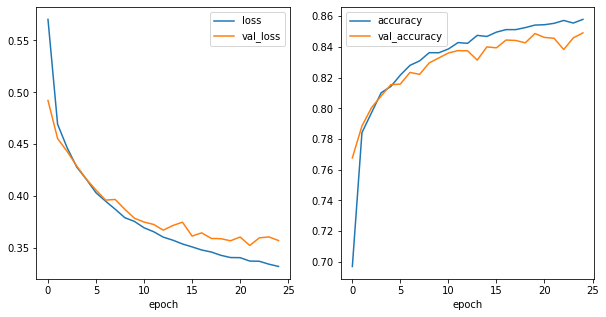

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(history_gender.history['loss'], label='loss')
axs[0].plot(history_gender.history['val_loss'], label='val_loss')
axs[0].set_xlabel('epoch')
axs[0].legend()

axs[1].plot(history_gender.history['accuracy'], label='accuracy')
axs[1].plot(history_gender.history['val_accuracy'], label='val_accuracy')
axs[1].set_xlabel('epoch')
axs[1].legend()
plt.show()

In [33]:
predictions3 = model_gender.predict(x_test3)

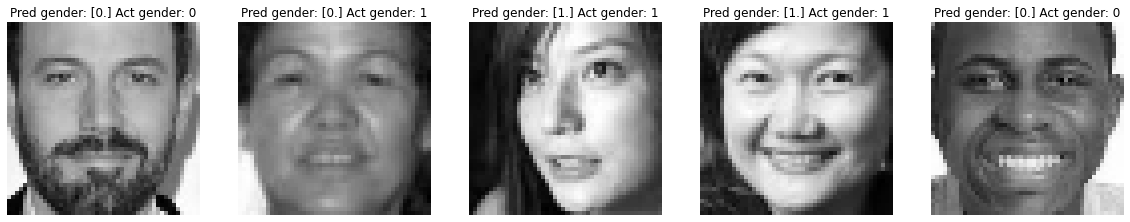

In [34]:
fig, axes = plt.subplots(1, 5, figsize=(20, 10))
for i in range(5):
    random_face = np.random.choice(len(predictions3))
    axes[i].set_title("Pred gender: {0} Act gender: {1}".format(np.round(predictions3[random_face]), y_test3[random_face]))
    axes[i].imshow(x_test3[random_face], cmap='gray')
    axes[i].axis('off')

In [35]:
false_predictions3 = []
x_false3 = []
y_false3 = []
for i in range(len(y_test3)):
    pred_class = np.round(predictions3[i])
    true_class = y_test3[i]
    if pred_class != true_class:
        x_false3.append(x_test3[i])
        y_false3.append(true_class)
        false_predictions3.append(pred_class)

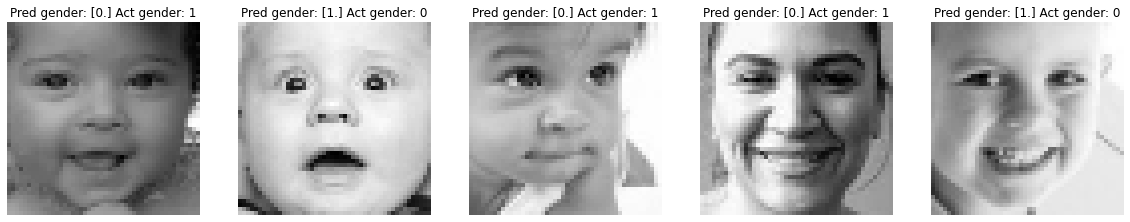

In [36]:
fig, axes = plt.subplots(1, 5, figsize=(20, 10))
for i in range(5):
    random_face = np.random.choice(len(false_predictions3))
    axes[i].set_title('Pred gender: ' + str(false_predictions3[random_face]) + ' Act gender: ' + str(y_false3[random_face]))
    axes[i].imshow(x_false3[random_face], cmap='gray')
    axes[i].axis('off')
plt.savefig("faces1")